# MNIST Handwritten Digit Classification

### 1. Performing ETL on the given Data

In [2]:
import os
import gzip
import shutil

os.makedirs("dataset", exist_ok=False) #Creating a new directory 

path = "data/"

files = os.listdir(path)
for file in files:
    if file.endswith("gz"):
        print("Extracting ", file)

        with gzip.open(path + file, "rb") as gzfile:
            with open("dataset/" + file.split(".")[0], "wb") as ubytefile:
                shutil.copyfileobj(f_in, f_out)

print("Extraction Complete")

Extracting  t10k-images-idx3-ubyte.gz
Extracting  train-labels-idx1-ubyte.gz
Extracting  train-images-idx3-ubyte.gz
Extracting  t10k-labels-idx1-ubyte.gz
Extraction Complete


In [1]:
import numpy as np
import idx2numpy as idx

data = "dataset/"
files = os.listdir("dataset/")
print(files)

# Loading the data set as train and test data
# The order may not be the same for a different device
y_train= idx.convert_from_file(data +files[0])
y_test= idx.convert_from_file(data + files[1])
X_train = idx.convert_from_file(data + files[2])
X_test = idx.convert_from_file(data + files[3])


['train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 't10k-images-idx3-ubyte']


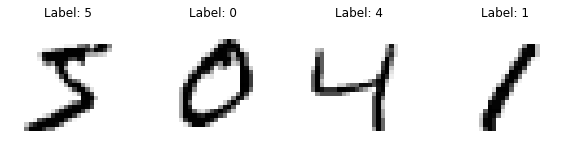

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#Display first 4 images in dataset
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train[:4], y_train[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    ax.set_title(f"Label: {label}")

### 2. Training the model

Opted to use SVMs as they show better performance and accuracy for datasets with moderate feature size, in this case, the images are around *28 x 28 pixles* resulting in **784 features**

In [3]:
X_train = np.reshape(X_train, (len(X_train), -1))
X_test = np.reshape(X_test, (len(X_test), -1))

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
model = SVC()
parameters = {
        'kernel' : ['rbf'], 'C' : [100,10,1,0.1], 'gamma' : ['scale', 0.01, 0.1]
    }

svm = GridSearchCV(estimator = model, param_grid = parameters,
 scoring = 'accuracy', refit = 'accuracy', cv = 5)

svm.fit(X_train, y_train)

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels= np.arange(0,10))

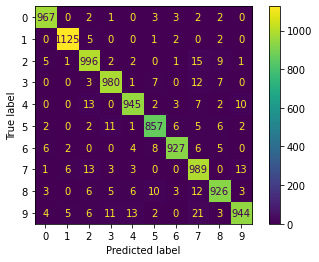

In [52]:

cmd.plot()

In [54]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_m = mm.fit_transform(X_train)
X_test_m = mm.fit_transform(X_test)

svm2 = SVC(kernel = "rbf")
svm2.fit(X_train_m, y_train)

SVC()

(10000,)
(10000,)
accuracy = 0.9656


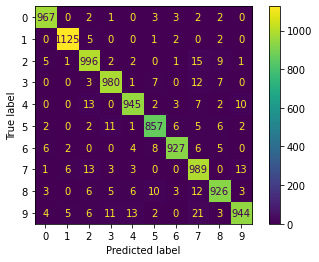

In [55]:
y_pred_m =svm.predict(X_test_s)

print(y_pred_m.shape)
print(y_test.shape)
print(f'''\
accuracy = {accuracy_score(y_test, y_pred_m)}\
''')

cmd2 = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_m), display_labels= np.arange(0,10))
cmd2.plot()